# Intro to Matplotlib

Matplotlib is the most commonly used plotting library in python.

This lecture will demo some of the most commonly used plotting features.

In [1]:
# import matplotlib
import matplotlib.pyplot as plt

# use ipython notebook's "magic" functions to plot directly in the notebook
%matplotlib inline

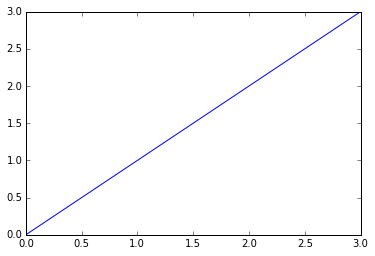

In [2]:
# basic usage: plt.plot(x, y)
plt.plot(range(4), range(4), 'b-')

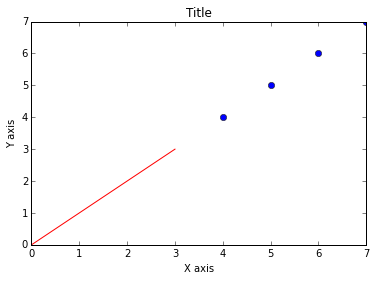

In [3]:
# can put multiple datasets on same plot
plt.plot(range(4), range(4), 'r-', 
         range(4, 8), range(4, 8), 'bo')
plt.title('Title')
plt.xlabel('X axis')
plt.ylabel('Y axis')

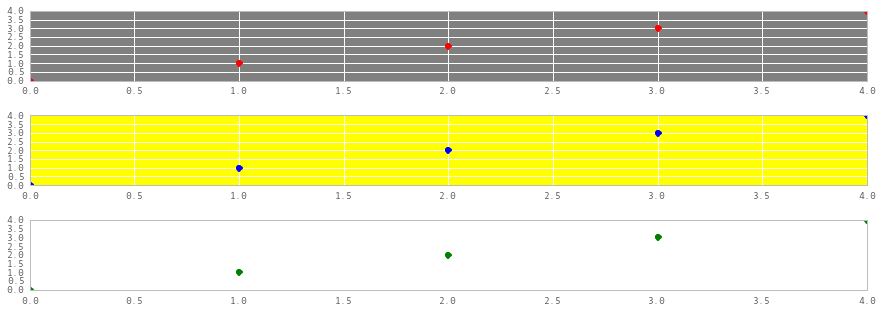

In [36]:
# subplots
fig = plt.figure()

# usage: fit.add_subplot(rows, columns, position)
axes1 = fig.add_subplot(3, 1, 1, axisbg='grey')
axes1.plot(range(5), range(5), 'ro')
axes2 = fig.add_subplot(3, 1, 2, axisbg='yellow')
axes2.plot(range(5), range(5), 'bo')
axes2 = fig.add_subplot(3, 1, 3, axisbg='white')
axes2.plot(range(5), range(5), 'go')

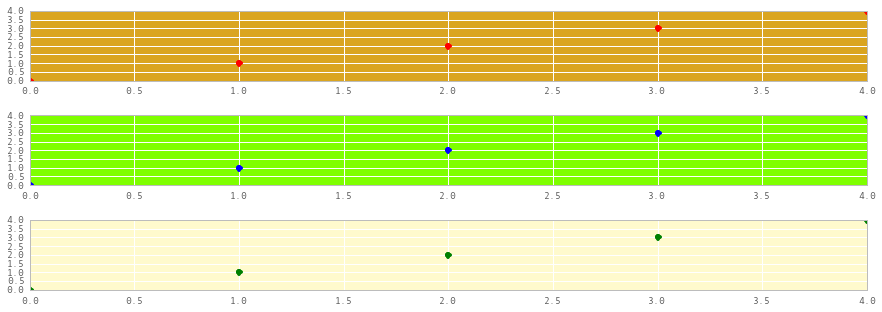

In [37]:
# any HTML color name is valid: http://www.w3schools.com/html/html_colornames.asp
fig = plt.figure()

# usage: fit.add_subplot(rows, columns, position)
axes1 = fig.add_subplot(3, 1, 1, axisbg='goldenrod')
axes1.plot(range(5), range(5), 'ro')
axes2 = fig.add_subplot(3, 1, 2, axisbg='chartreuse')
axes2.plot(range(5), range(5), 'bo')
axes2 = fig.add_subplot(3, 1, 3, axisbg='lemonchiffon')
axes2.plot(range(5), range(5), 'go')

# Pandas has built-in support for matplotlib

In [5]:
# import some demo data
import pandas as pd

df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


In [27]:
# set the style options (makes it prettier)
# more info: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html
pd.set_option('display.mpl_style', 'default') 

# set the figure size
plt.rcParams['figure.figsize'] = (15, 5)

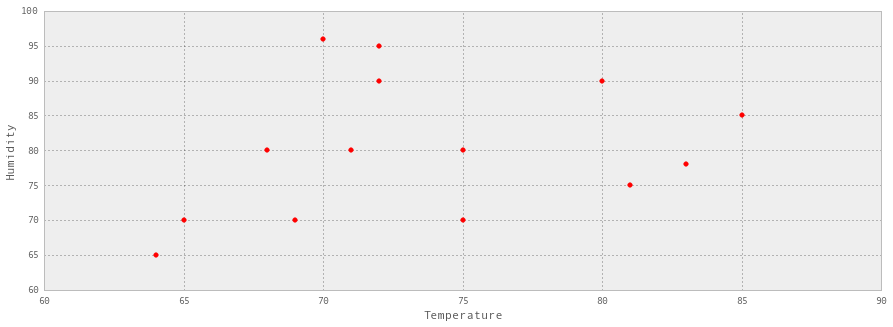

In [7]:
# .plot is a method inside of DataFrame objects
df[['Temperature','Humidity']].plot(kind='scatter', 
                                    x='Temperature', 
                                    y='Humidity', 
                                    color='red')

(0, 7.5)

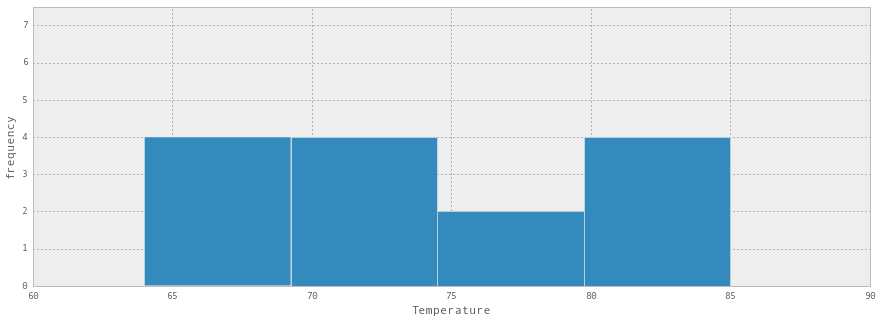

In [8]:
# Histograms
df['Temperature'].hist(grid=True, bins=4)
plt.xlabel("Temperature")
plt.ylabel("frequency")
plt.xlim([60, 90])
plt.ylim([0, 7.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b268310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b532bd0>]], dtype=object)

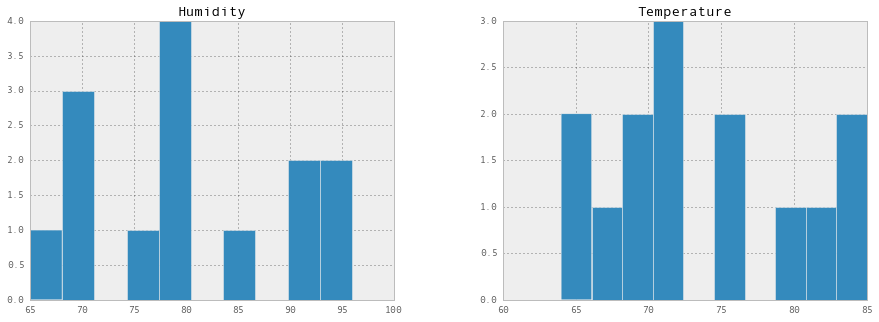

In [9]:
df.hist(['Temperature','Humidity'], bins=10)

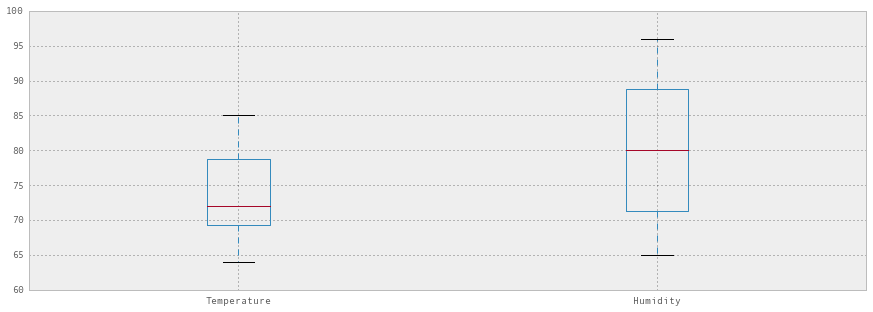

In [10]:
# box plot
df[['Temperature','Humidity']].plot(kind='box')

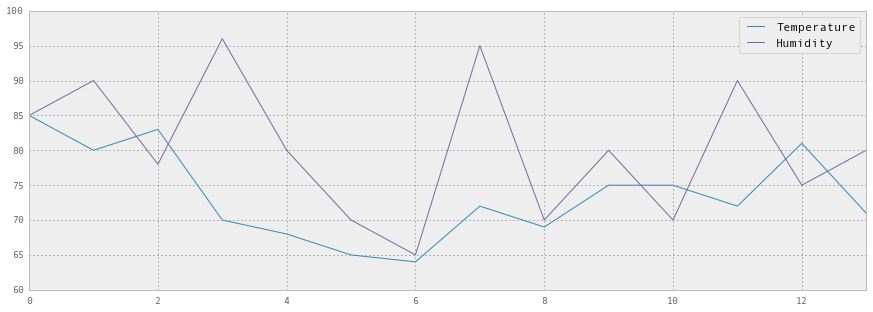

In [11]:
# line chart
df[['Temperature','Humidity']].plot(kind='line')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b7388d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d87fa50>]], dtype=object)

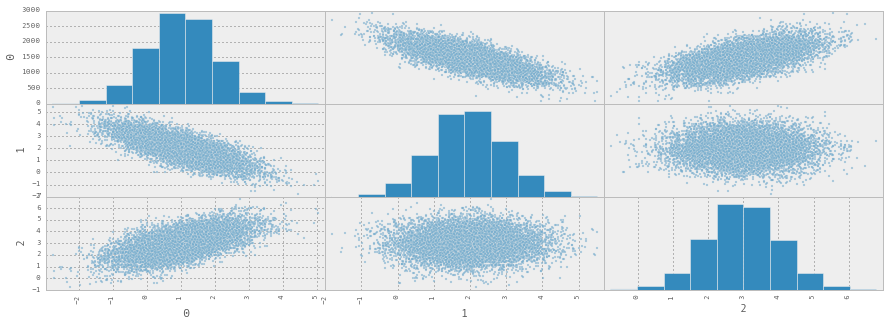

In [12]:
# scatter matrix, to show pairwise relationships

import numpy as np

data = np.random.multivariate_normal(mean=[1, 2, 3], 
                                     cov=[[1, -.75, .6],
                                          [-.75, 1, 0],
                                          [.6, 0 ,1]], 
                                     size=10000)
df = pd.DataFrame(data)

pd.scatter_matrix(df)

          0         1         2
0  1.000000 -0.749393  0.607289
1 -0.749393  1.000000 -0.008777
2  0.607289 -0.008777  1.000000


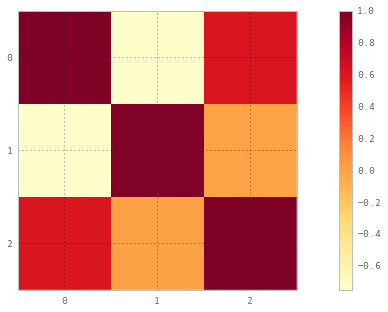

In [13]:
# heatmap of correlations
allcorr = df.corr()
print allcorr
plt.imshow(allcorr, cmap='YlOrRd', interpolation='none');
plt.colorbar()
plt.xticks(range(len(allcorr)), allcorr.columns)
plt.yticks(range(len(allcorr)), allcorr.columns)
plt.savefig("heat_map.jpg")
plt.show()

# Seaborn

Seaborn is a more feature-rich plotting library, built on top of matplotlib

In [14]:
import seaborn as sns

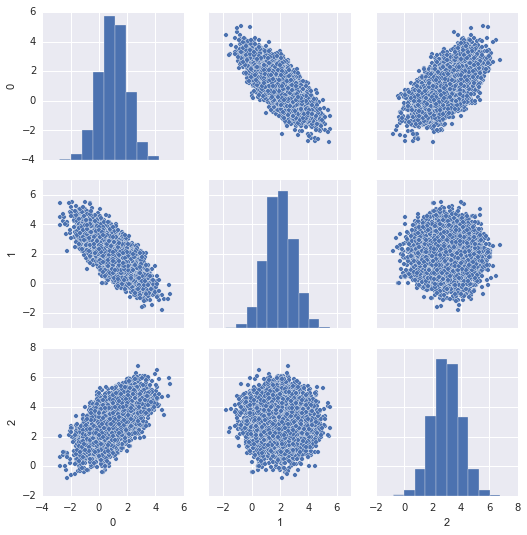

In [15]:
sns.pairplot(df)

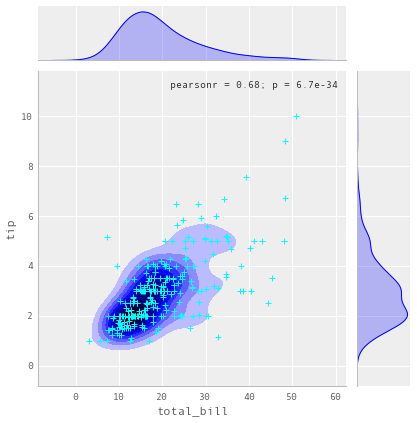

In [31]:
# visualizing pairwise relationships with scatter and kde

tips_df = sns.load_dataset("tips")

# more info: http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
g = sns.jointplot(x='total_bill', y='tip', data=tips_df, kind="kde", color="b")
g.plot_joint(plt.scatter, c="cyan", s=30, linewidth=1, marker="+")

# set transparency, try changing to number between 0 and 1
# more info: http://matplotlib.org/1.4.3/api/collections_api.html?highlight=set_alpha#matplotlib.collections.Collection.set_alpha
g.ax_joint.collections[0].set_alpha(0) 


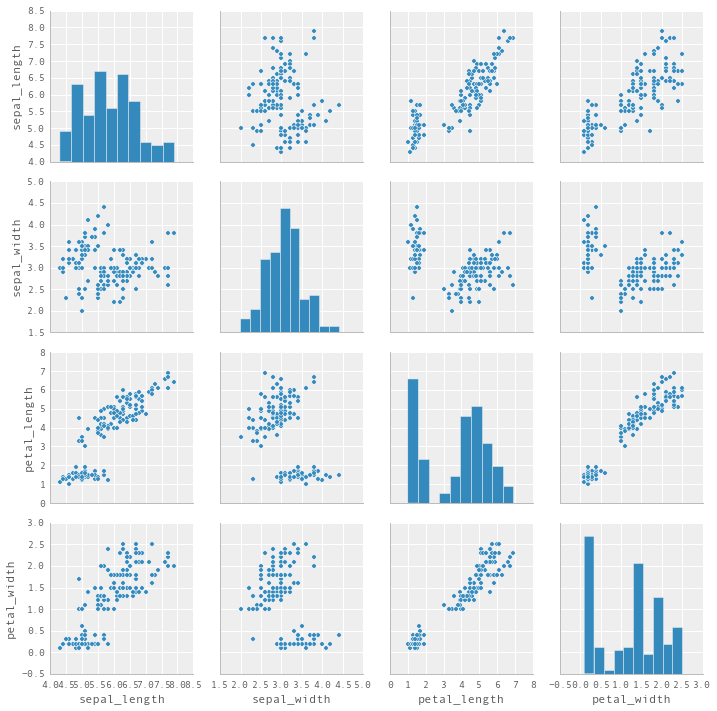

In [41]:
iris = sns.load_dataset("iris")

sns.pairplot(iris)

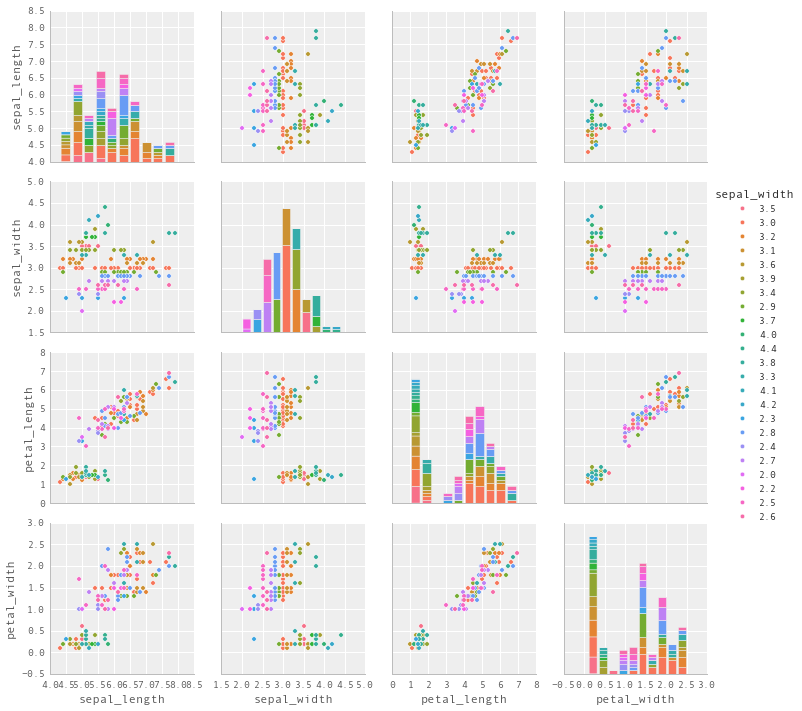

In [43]:
# add color coding to pair plot to visualize 3rd dimension
sns.pairplot(iris, hue='sepal_width')

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


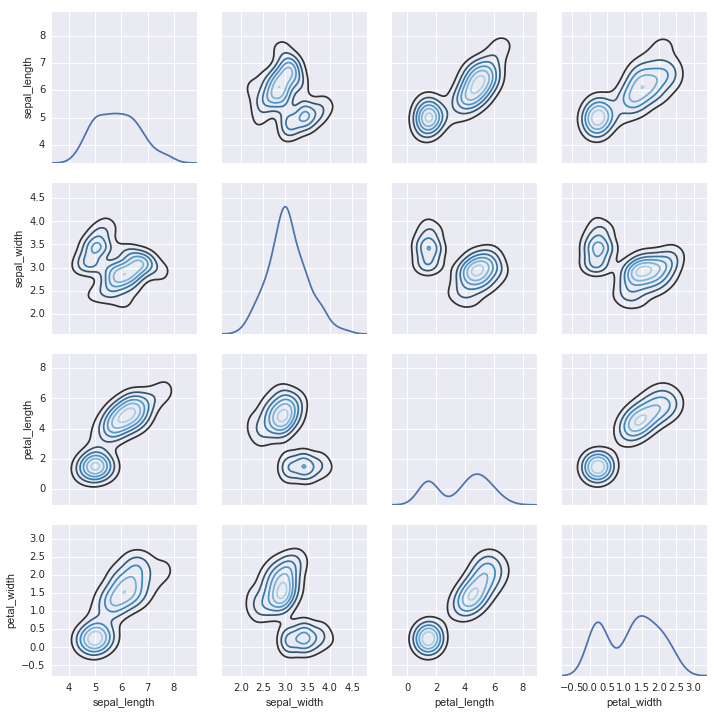

In [25]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

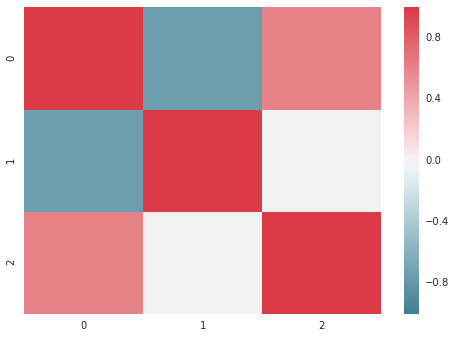

In [26]:
# correlation matrix, like in matplotlib

# Generate a custom "diverging palette"
# uses HUSL colors, more info: http://www.husl-colors.org/
cmap = sns.diverging_palette(220, 10, as_cmap=True) 

sns.heatmap(allcorr, cmap=cmap)

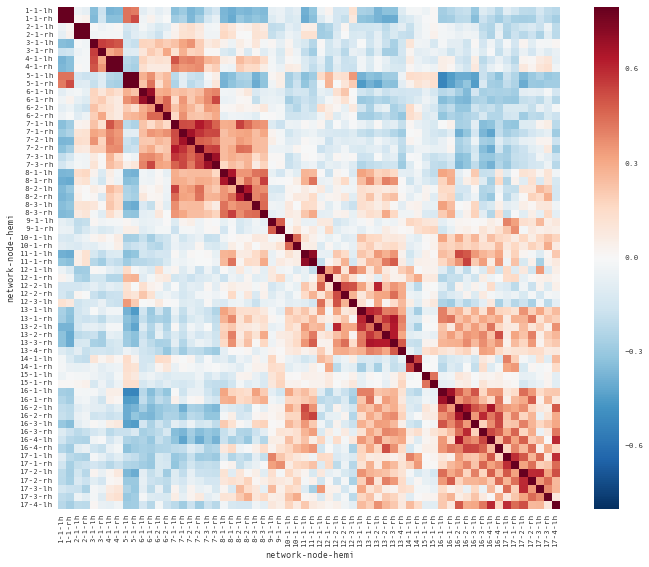

In [29]:
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
brain_df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = brain_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)


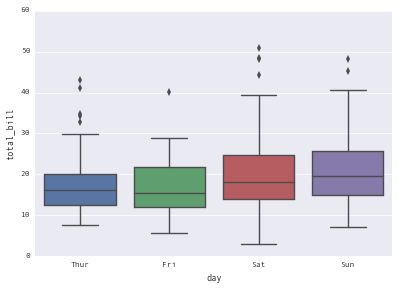

In [31]:
tips_df = sns.load_dataset("tips")

sns.boxplot("day", "total_bill", data=tips_df)

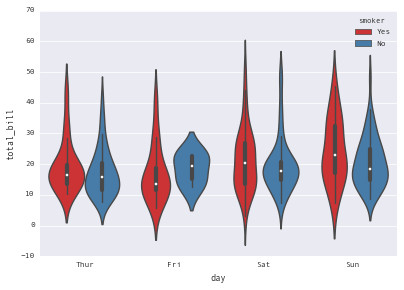

In [33]:
# Violin plot
sns.violinplot("day", "total_bill", "smoker", 
               data=tips_df, palette="Set1", split=False)

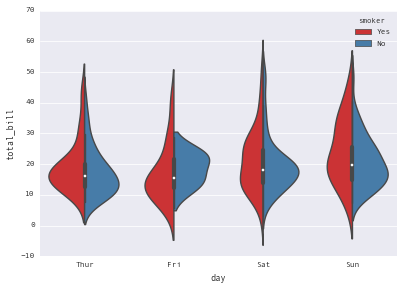

In [34]:
sns.violinplot("day", "total_bill", "smoker", 
               data=tips_df, palette="Set1", split=True)

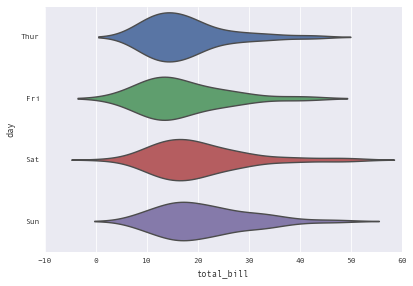

In [38]:
# violin plot
sns.violinplot("total_bill", "day", data=tips_df, inner=None)

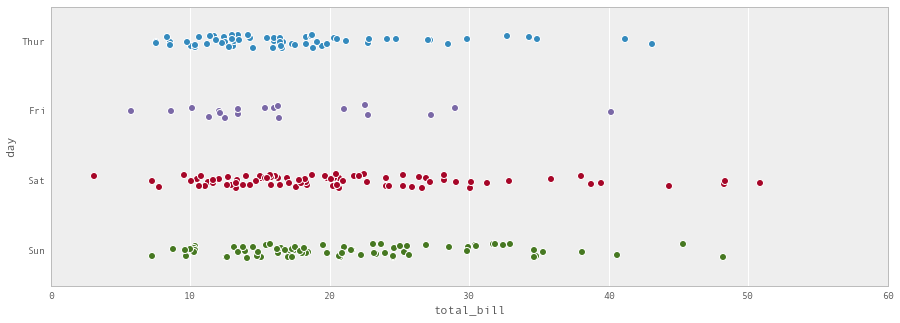

In [39]:
# strip plot
sns.stripplot("total_bill", "day", data=tips_df, jitter=True)

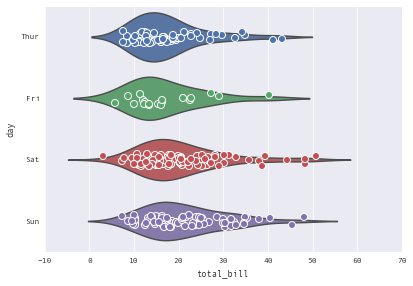

In [40]:
# combined violin and strip plot
sns.violinplot("total_bill", "day", data=tips_df, inner=None)
sns.stripplot("total_bill", "day", data=tips_df, jitter=True)